# Домашнее задание 9

Это домашнее задание по материалам 12го семинара. Дедлайн по отправке - 23:55 5 мая. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_9

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим одномерную задачу минимизации:
\begin{equation}
\min_{x \in \mathbb{R}} f(x) = x \arctan x - \frac{1}{2} \log (1 + x^2).
\end{equation}

__(а)__ Реализуйте для этой задачи метод градиентного спуска и метод Ньютона. Нарисуйте графики сходимости данных методов для двух разных точек старта $x^0 = 1.3$ и $x^0 = 1.5$. Сделайте вывод. В общем случае для каких $x^0$ еще есть сходимость метода Ньютона, а для каких она пропадает? Почему?

Для того чтобы ответить на этот вопрос, сначала найдем производные функции $f(x)$: 


$$f'(x) = \arctan(x)$$
$$f''(x) = \frac{1}{1+x^2}$$


In [27]:
import numpy as np
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import ticker
from sklearn.datasets import load_svmlight_file
from sklearn.linear_model import LinearRegression
import time 
from scipy.stats import special_ortho_group, ortho_group
import matplotlib.gridspec as gridspec
import random

In [28]:
## Adding constants
L = 1
M = 0.65
llambda = 1

In [29]:
def generate_matrix(d_local, mu_local, L_local):
    i = 0
    while i == 0:
        diagonal_entries = np.random.uniform(mu_local, L_local, d_local)
        diagonal_entries[0] = mu_local
        diagonal_entries[1] = L_local
        D = np.diag(diagonal_entries)
        m = special_ortho_group.rvs(d_local)
        A = (np.linalg.inv(m).dot(D)).dot(m)
        np.set_printoptions(suppress=True)
        if (is_pos_def(A-mu_local*E)):
            i += 1
    return A
    
def is_pos_def(x): #проверка положительной определённости
    return np.all(np.linalg.eigvals(x) > 0)

def gradient(x): 
    return np.arctan(x)

def hessian(x):
    return(1/(1 + x**2))

In [30]:
def gradient_descent(start, learn_rate, n_iter):
    values_x = []
    values_y = []
    vector = start
    vector_list = []
    grad = gradient(vector)
    values_x.append(0)
    values_y.append(abs(grad))
    i = 0
    while(abs(grad) > 1e-30 and i < n_iter):
        vector = vector - learn_rate * (grad)
        grad = gradient(vector)
        values_x.append(i+1)
        values_y.append(abs(grad))
        vector_list.append(vector)
        i += 1
    return values_x, values_y, vector

def newton(start, learn_rate, n_iter):
    values_x = []
    values_y = []
    vector = start
    vector_list = []
    grad = gradient(vector)
    i = 0
    values_x.append(i)
    values_y.append(abs(grad))
    while(abs(grad) > 1e-30 and i < n_iter):
        vector = vector - hessian(vector) ** (-1) * (grad)
        grad = gradient(vector)
        values_x.append(i+1)
        values_y.append(abs(grad))
        vector_list.append(vector)
        i += 1
    return values_x, values_y, vector

In [31]:
start = 1.3
gamma1 = 1/L
gamma2 = 1
n_gd, x_gd, vector_gd = gradient_descent(start, gamma1, 100)
n_newton, x_newton, vector_newton = newton(start, gamma2, 10)

start1 = 1.5
n_gd_2, x_gd_2, vector_gd_2 = gradient_descent(start1, gamma1, 100)
n_newton_2, x_newton_2, vector_newton_2 = newton(start1, gamma2, 10)

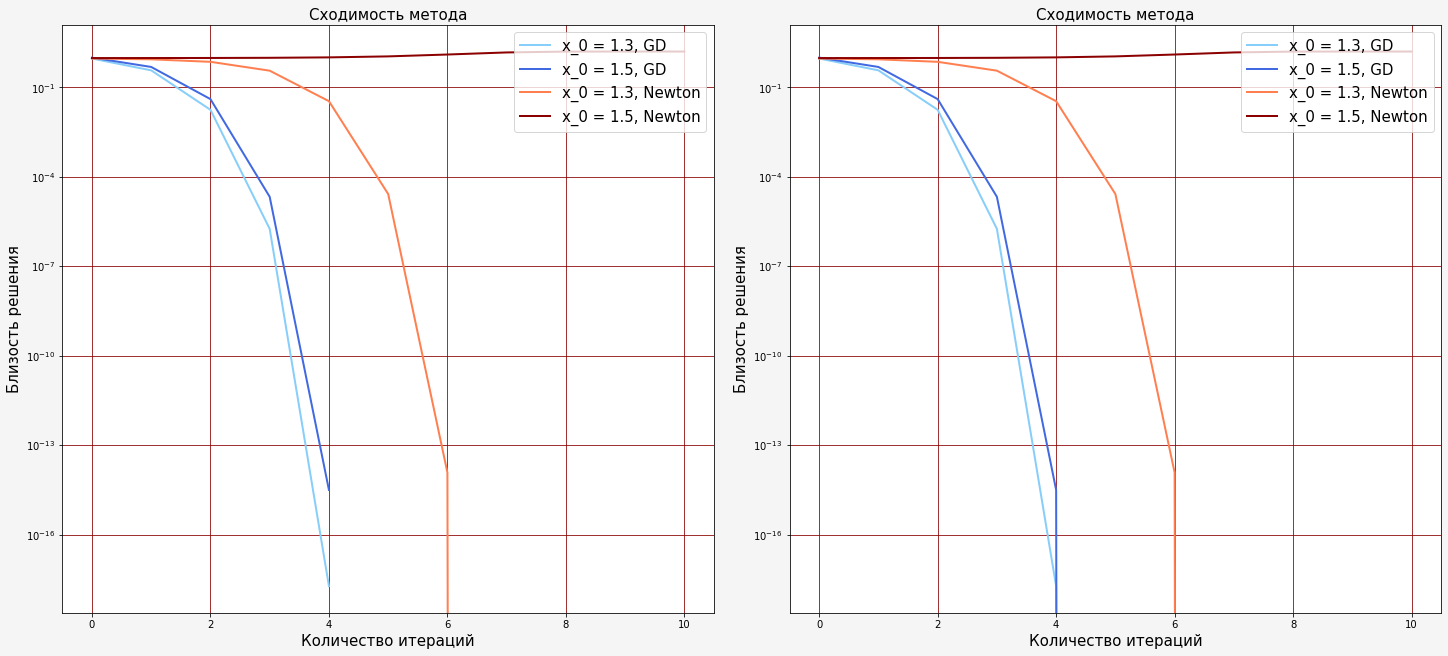

In [48]:
fg = plt.figure(figsize=(20, 9), constrained_layout=True, facecolor = "whitesmoke")
gs = gridspec.GridSpec(ncols=2, nrows=1, figure=fg)

fig_ax_1 = fg.add_subplot(gs[0, 0], facecolor = "white")

fig_ax_1.plot(n_gd[:5:1], x_gd[:5:1], 'lightskyblue', label = 'x_0 = 1.3, GD', linewidth=2)
fig_ax_1.plot(n_gd_2[:5:1], x_gd_2[:5:1], 'royalblue', label = 'x_0 = 1.5, GD', linewidth=2)
fig_ax_1.plot(n_newton[::1], x_newton[::1], 'coral', label = 'x_0 = 1.3, Newton', linewidth=2)
fig_ax_1.plot(n_newton_2[::1], x_newton_2[::1], 'darkred', label = 'x_0 = 1.5, Newton', linewidth=2)
fig_ax_1.legend(loc="upper right", fontsize=15)
fig_ax_1.semilogy()
fig_ax_1.set_xlabel("Количество итераций", fontsize=15)
fig_ax_1.set_ylabel("Близость решения", fontsize=15)
fig_ax_1.set_title('Сходимость метода', fontsize=15)
fig_ax_1.grid(color='darkred')

fig_ax_1 = fg.add_subplot(gs[0, 1], facecolor = "white")
fig_ax_1.plot(n_gd[::1], x_gd[::1], 'lightskyblue', label = 'x_0 = 1.3, GD', linewidth=2)
fig_ax_1.plot(n_gd_2[::1], x_gd_2[::1], 'royalblue', label = 'x_0 = 1.5, GD', linewidth=2)
fig_ax_1.plot(n_newton[::1], x_newton[::1], 'coral', label = 'x_0 = 1.3, Newton', linewidth=2)
fig_ax_1.plot(n_newton_2[::1], x_newton_2[::1], 'darkred', label = 'x_0 = 1.5, Newton', linewidth=2)
fig_ax_1.legend(loc="upper right", fontsize=15)
fig_ax_1.semilogy()
fig_ax_1.set_xlabel("Количество итераций", fontsize=15)
fig_ax_1.set_ylabel("Близость решения", fontsize=15)
fig_ax_1.set_title('Сходимость метода', fontsize=15)
fig_ax_1.grid(color='darkred')

#### Вывод: Заметим, что у нас метод сходится для обеих точек за 4 итерации в градиентному спуске. Метод Ньютона сходится за 6 итераций для точки $x_0 = 1.3$ и не сходится для второй точки

Метод Ньютона сходится, если начальная точка $x^0$ выбрана достаточно близко к точке минимума и функция $f(x)$ является выпуклой на интервале, содержащем $x^0$ и точку минимума. Однако, сходимость метода Ньютона также зависит от начальной точки $x^0$. Если начальная точка выбрана слишком далеко от точки минимума, метод Ньютона может не сойтись.

Определим область сходимости метода: $\|x_0 - x_*\| < \frac{2L}{3M}$
\begin{equation}
    \begin{cases}
      \|\nabla ^2 f(x) - \nabla ^2 f(y)\| \leq M\|x - y\|\\
      \nabla ^2 f(x^*) \geqslant L I, L > 0\\
      \|x^0 - x^*\| < \frac{2L}{3M}
    \end{cases}\,.
\end{equation}

В данном случае, $L = 1$.

$ M = \max f'''(x) = \max(-\frac{2x}{(1 + x^2)^2}) \Rightarrow \frac{(-2 + 6 x^2)}{(1 + x^2)^3} = 0 \Rightarrow x = -\frac{1}{\sqrt{3}} \Rightarrow M = \frac{3\sqrt{3}}{8} \approx 0.65 $. 


Тогда метод сходится, при $\|x^0 - x^*\| = \|x^0\| < 1.025$ 


Но на практике условие достаточно, но не необходимо. Найдем реальный радиус сходимости: При $x_0 = 1.39$ метод сходится, а при $x_0 = 1.395$ уже нет. 

In [53]:
start1 = 1.39
n_newton_3, x_newton_3, vector_newton_3 = newton(start1, gamma2, 10)
start1 = 1.395
n_newton_4, x_newton_4, vector_newton_4 = newton(start1, gamma2, 10)

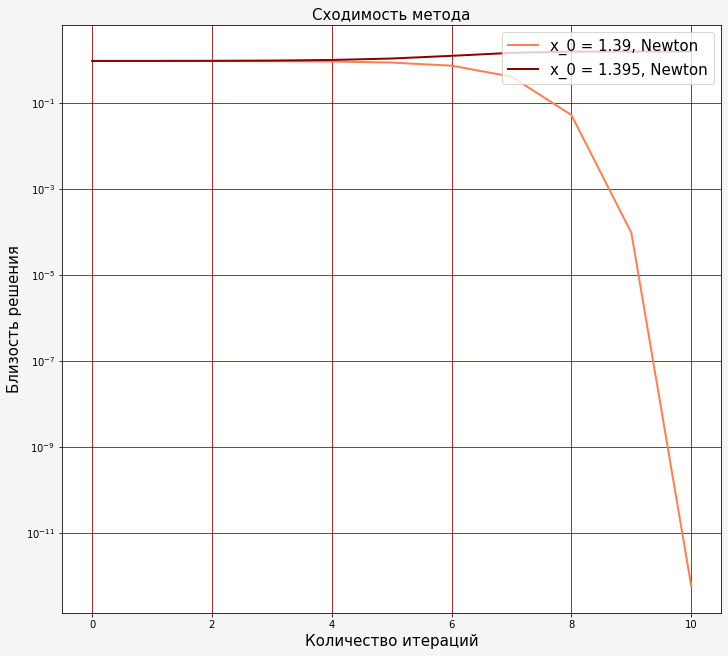

In [54]:
fg = plt.figure(figsize=(10, 9), constrained_layout=True, facecolor = "whitesmoke")
gs = gridspec.GridSpec(ncols=1, nrows=1, figure=fg)

fig_ax_1 = fg.add_subplot(gs[0, 0], facecolor = "white")

fig_ax_1.plot(n_newton_3[::1], x_newton_3[::1], 'coral', label = 'x_0 = 1.39, Newton', linewidth=2)
fig_ax_1.plot(n_newton_4[::1], x_newton_4[::1], 'darkred', label = 'x_0 = 1.395, Newton', linewidth=2)
fig_ax_1.legend(loc="upper right", fontsize=15)
fig_ax_1.semilogy()
fig_ax_1.set_xlabel("Количество итераций", fontsize=15)
fig_ax_1.set_ylabel("Близость решения", fontsize=15)
fig_ax_1.set_title('Сходимость метода', fontsize=15)
fig_ax_1.grid(color='darkred')


__(б)__ Реализуйте две модификации метода Ньютона: демпфированный (добавление шага) и кубический метод Ньютона (смотри [статью](https://link.springer.com/article/10.1007/s10107-006-0706-8)). Решают ли эти методы проблему сходимости метода Ньютона для стартовой точки $x^0 = 1.5$? В демпфированном методе попробуйте разные стратегии подбора шага: увеличивающийся, Армихо и другие.

Получим итерацию кубического метода:
$$
x^{k  + 1} = \text{argmin}_{x \in \mathbb{R}}(f(x^k) + <\nabla f(x^k), x - x^k> + \frac{1}{2} <x - x^k, \nabla^2 f(x^k)(x - x^k)> + \frac{M}{6}||x^k - x||^3)
$$
Тогда решаем квадратное уравнение:
$$
x^{k + 1} = x^k - \frac{\sqrt{(\nabla^2f(x^k))^2 + 2M\nabla f(x^k}) - \nabla^2f(x^k)}{M}
$$

In [7]:
def newton_step(start, n_iter):
    values_x = []
    values_y = []
    vector = start
    vector_list = []
    grad = gradient(vector)
    i = 0
    values_x.append(i)
    values_y.append(abs(grad))
    while(abs(grad) > 1e-30 and i < n_iter):
        vector = vector - np.log(i + 2) ** 1/3 * hessian(vector) ** (-1) * (grad)
        grad = gradient(vector)
        values_x.append(i+1)
        values_y.append(abs(grad))
        vector_list.append(vector)
        i += 1
    return values_x, values_y, vector

def f(x):
    return x * np.arctan(x) - 1/2 * np.log(1 + x**2) 

def newton_armijo(start, gamma, n_iter, epsilon, theta):
    values_x = []
    values_y = []
    vector = start
    vector_list = []
    grad = gradient(vector)
    i = 0
    values_x.append(i)
    values_y.append(abs(grad))
    while(abs(grad) > 1e-30 and i < n_iter):
        hess = hessian(vector)
        while (f(vector - gamma / hess *  grad) >= f(vector) - epsilon * gamma / hess * grad):
            gamma = gamma * theta
        vector = vector - gamma / hess * (grad)
        grad = gradient(vector)
        values_x.append(i+1)
        values_y.append(abs(grad))
        vector_list.append(vector)
        i += 1
    return values_x, values_y, vector

def newton_cube(start, n_iter):
    values_x = []
    values_y = []
    vector = start
    vector_list = []
    grad = gradient(vector)
    i = 0
    values_x.append(i)
    values_y.append(abs(grad))
    while(abs(grad) > 1e-30 and i < n_iter):
        hess = hessian(vector)
        vector = vector - 1/M * (np.sqrt(hess**2 + 2 * M * grad) - hess)
        grad = gradient(vector)
        values_x.append(i+1)
        values_y.append(abs(grad))
        vector_list.append(vector)
        i += 1
    return values_x, values_y, vector


In [8]:
start = 1.3
n_newton_step, x_newton_step, vector_newton_step = newton_step(start, 1000)
n_newton_armijo, x_newton_armijo, vector_newton_armijo = newton_armijo(start, gamma2, 100, 0.3, 0.9)
n_newton_cube, x_newton_cube, vector_newton_cube = newton_cube(start, 30)


start1 = 1.5
n_newton_step_2, x_newton_step_2, vector_newton_step_2 = newton_step(start1, 1000)
n_newton_armijo_2, x_newton_armijo_2, vector_newton_armijo_2 = newton_armijo(start1, gamma2, 100, 0.3, 0.9)
n_newton_cube_1, x_newton_cube_1, vector_newton_cube_1 = newton_cube(start1, 30)


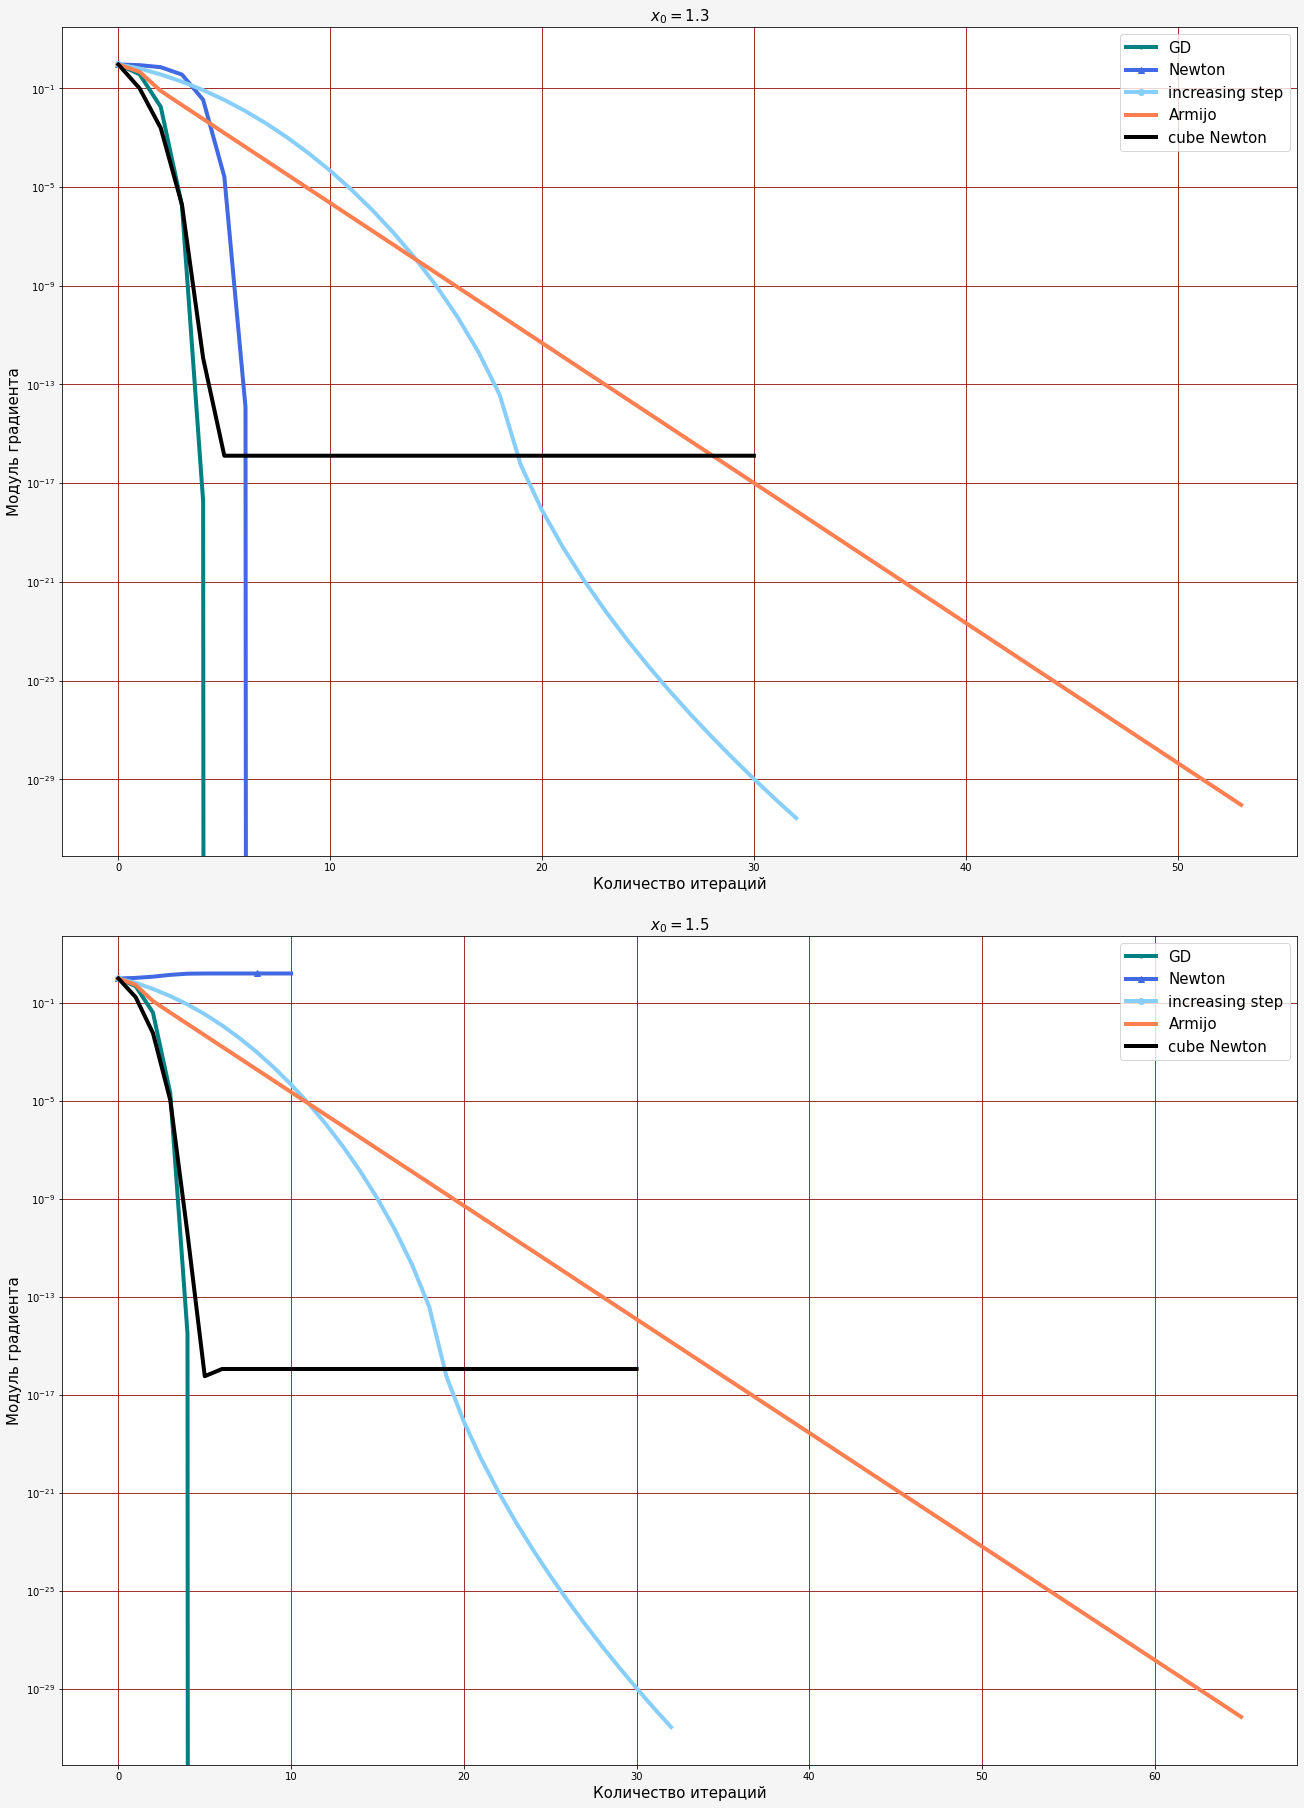

In [9]:
fg = plt.figure(figsize=(18, 25), constrained_layout=True, facecolor = "whitesmoke")
gs = gridspec.GridSpec(ncols=1, nrows=2, figure=fg)

fig_ax_1 = fg.add_subplot(gs[0, 0], facecolor = "white")

fig_ax_1.plot(n_gd[::1], x_gd[::1], 'teal', label = 'GD', linewidth=4, marker = '.', markevery = 5)
fig_ax_1.plot(n_newton[::1], x_newton[::1], 'royalblue', label = 'Newton', linewidth=4, marker = '^', markevery = 8)
fig_ax_1.plot(n_newton_step[::1], x_newton_step[::1], 'lightskyblue', label = 'increasing step', linewidth=4, marker = 'o', markevery = 6.5)
fig_ax_1.plot(n_newton_armijo[::1], x_newton_armijo[::1], 'coral', label = 'Armijo', linewidth=4)
fig_ax_1.plot(n_newton_cube[::1], x_newton_cube[::1], 'black', label = 'cube Newton', linewidth=4)
fig_ax_1.legend(loc="upper right", fontsize=15)
fig_ax_1.semilogy()
fig_ax_1.set_xlabel("Количество итераций", fontsize=15)
fig_ax_1.set_ylabel("Модуль градиента", fontsize=15)
fig_ax_1.set_title(r'$x_0 = 1.3$', fontsize=15)
fig_ax_1.grid(color='darkred')

fig_ax_1 = fg.add_subplot(gs[1, 0], facecolor = "white")

fig_ax_1.plot(n_gd_2[::1], x_gd_2[::1], 'teal', label = 'GD', linewidth=4, marker = '.', markevery = 5)
fig_ax_1.plot(n_newton_2[::1], x_newton_2[::1], 'royalblue', label = 'Newton', linewidth=4, marker = '^', markevery = 8)
fig_ax_1.plot(n_newton_step_2[::1], x_newton_step_2[::1], 'lightskyblue', label = 'increasing step', linewidth=4, marker = 'o', markevery = 6.5)
fig_ax_1.plot(n_newton_armijo_2[::1], x_newton_armijo_2[::1], 'coral', label = 'Armijo', linewidth=4)
fig_ax_1.plot(n_newton_cube_1[::1], x_newton_cube_1[::1], 'black', label = 'cube Newton', linewidth=4)
fig_ax_1.legend(loc="upper right", fontsize=15)
fig_ax_1.semilogy()
fig_ax_1.set_xlabel("Количество итераций", fontsize=15)
fig_ax_1.set_ylabel("Модуль градиента", fontsize=15)
fig_ax_1.set_title(r'$x_0 = 1.5$', fontsize=15)
fig_ax_1.grid(color='darkred')



### Вывод:
Для точки $x_0 = 1.5$ удалось решить проблему метода Ньютона: остальные методы хорошо сходятся, Армихо хуже всего, увеличивающийся шаг и кубический метод Ньютона получше. Ну а для $x_0 = 1.3$ всё то же самое, только еще и обычный метод Ньтона сходится хорошо.

## Задача 2

Вернемся к задаче логистической регресии на датасете _mushrooms_. Добавьте к этой задаче $\ell_2$-регуляризатор с $\lambda = L/100$. 

__(а)__ Для данной задачи реализуйте метод Ньютона и метод градиентного спуска. Попробуйте комбинировать эти два метода, чтобы добиться хорошего решения задачи регрессии, но избежать расходимости метода Ньютона. Как это будете делать? Постройте график сходимости.

In [10]:
dataset = "mushrooms.txt" 

data = load_svmlight_file(dataset)
X_all, y_all = data[0].toarray(), data[1]
n_all, d_all = X_all.shape
#print(y)
y_all = 2 * y_all - 3
#print(y)
X, X_test, y, y_test = train_test_split(X_all, y_all, train_size=0.81, random_state=42)
n, d = X.shape


L = 1/n * 2 * max(np.linalg.eigvalsh((X.T.dot(X) + 2 * 1/100 * np.eye(d))))
llambda = L / 100
start_ = np.ones(d) / d

In [11]:
def f(omega):
    summa  = 0
    for i in range(n):
        expon = np.exp(-omega.T@(X[i]*y[i]))
        summa += np.log(1 + expon)
    return 1/n*summa + llambda * (np.linalg.norm(omega))**2

def gradient(omega):
    summa  = 0
    for i in range(n):
        expon = np.exp(-omega.T@(X[i]*y[i]))
        summa += X[i]*expon/(1+expon)*y[i]
    return -1/n*summa + 2 * llambda * omega

def hessian(omega):
    summa  = 0
    for i in range(n):
        expon = np.exp(-omega.T@(X[i]*y[i]))
        summa += expon* (X[i].T*X[i]/(1+expon))**2
    return 1/n*summa + 2 * llambda * np.eye(d)

In [12]:
def newton_GD(start, n_iter):
    values_x = []
    values_y = []
    vector = start
    vector_list = []
    grad = gradient(vector)
    i = 0
    values_x.append(i)
    norma = np.linalg.norm(grad)
    values_y.append(norma)
    while(norma > 0.1 and i < n_iter):
        vector = vector - 1 / L * (grad)
        grad = gradient(vector)
        norma = np.linalg.norm(grad)
        values_x.append(i+1)
        values_y.append(norma)
        vector_list.append(vector)
        i += 1
    hess_inv = np.linalg.inv(hessian(vector))
    print('GD -> Newton', i)
    while(norma > 1e-15 and i < n_iter):
        vector = vector - hess_inv.dot(grad)
        grad = gradient(vector)
        norma = np.linalg.norm(grad)
        values_x.append(i+1)
        values_y.append(norma)
        vector_list.append(vector)
        i += 1
    return values_x, values_y, vector

In [13]:

n_newton_gd, x_newton_gd, vector_newton_gd = newton_GD(start_, 100)

GD -> Newton 45


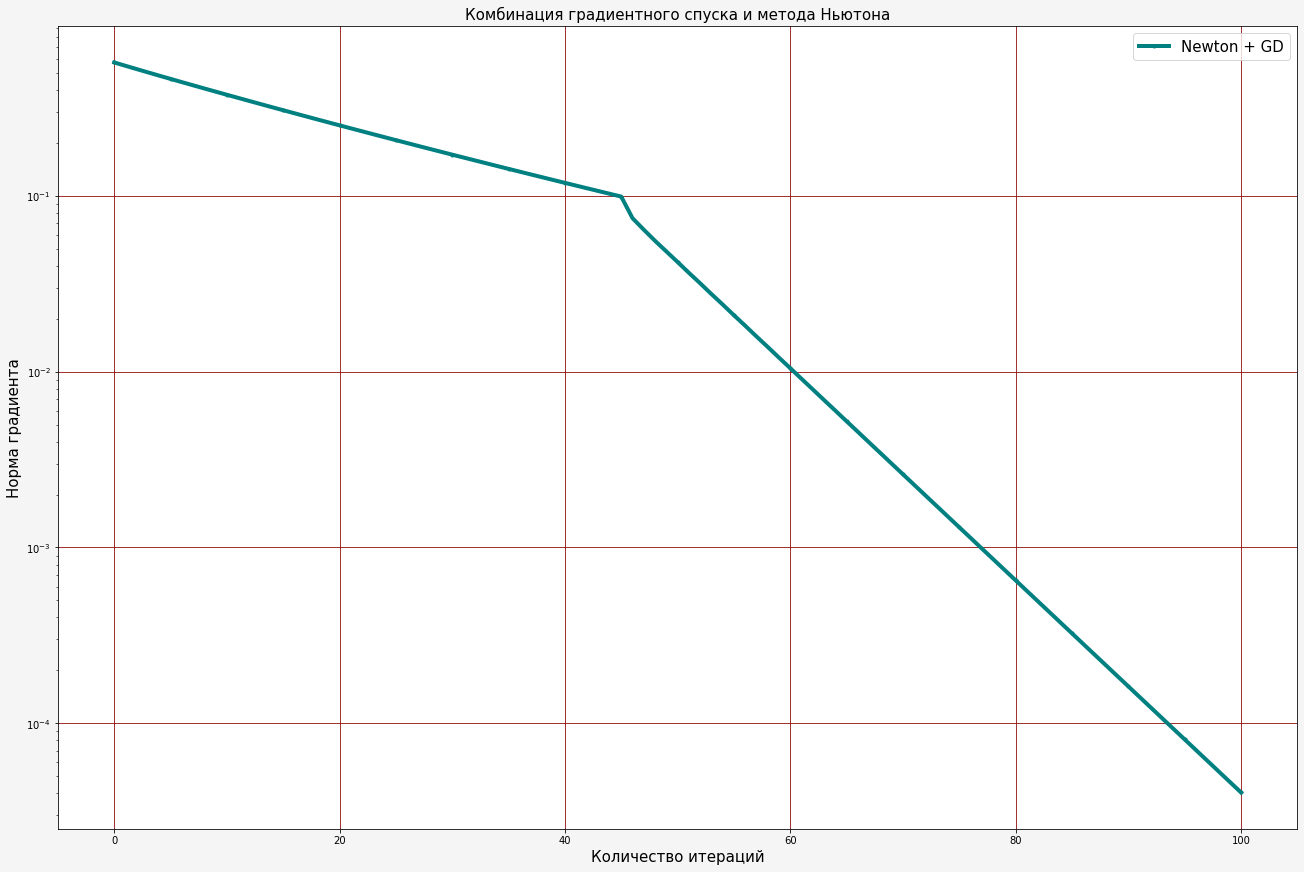

In [14]:
fg = plt.figure(figsize=(18, 12), constrained_layout=True, facecolor = "whitesmoke")
gs = gridspec.GridSpec(ncols=1, nrows=1, figure=fg)

fig_ax_1 = fg.add_subplot(gs[0, 0], facecolor = "white")

fig_ax_1.plot(n_newton_gd[::1], x_newton_gd[::1], 'teal', label = 'Newton + GD', linewidth=4, marker = '.', markevery = 5)
fig_ax_1.legend(loc="upper right", fontsize=15)
fig_ax_1.semilogy()
fig_ax_1.set_xlabel("Количество итераций", fontsize=15)
fig_ax_1.set_ylabel("Норма градиента", fontsize=15)
fig_ax_1.set_title('Комбинация градиентного спуска и метода Ньютона', fontsize=15)
fig_ax_1.grid(color='darkred')
length = len(n_newton_gd)
#plt.xticks(np.arange(0, length, 2))
#print("Комбинированный график:")


### Вывод:
Сначала мы подберемся достаточно близко в окрестность решения с помощью градиентного спуска, а затем Ньютоном быстро добьем до итогового решения. Точка смены метода видна на графике.

__(б)__ Для данной задачи реализуйте квазиньютоновские методы: Бройдена, DFP, BFGS (смотри Главу 6 из [книги](https://www.csie.ntu.edu.tw/~r97002/temp/num_optimization.pdf), а особенности реализации можно посмотреть [здесь](https://github.com/scipy/scipy/blob/v0.18.1/scipy/optimize/optimize.py#L874-L976)), L-BFGS (смотри [статью](http://users.iems.northwestern.edu/~nocedal/PDFfiles/limited-memory.pdf)). Решите с помощью них задачу регресии. Постройте графики сходимости и изменения accuracy. Сделайте вывод.

In [15]:
def precision(x):
    schett = 0
    for j in range(len(y_test)):
        aaa = (y_test[j])*((x.dot(X_test[j])))
        if (aaa) < 0:
            schett += 1
    return (len(y_test) - schett)/(len(y_test))*100

def Broyden(start, n_iter):
    values_x = []
    values_y = []
    vector_list = []
    vector = start
    hess = hessian(vector)
    grad = gradient(vector)
    norma = np.linalg.norm(grad)
    i = 0
    while(norma > 1e-15 and i < n_iter):
        values_y.append(norma)
        values_x.append(i)
        vector_list.append(vector)
        
        vector_ = vector
        vector = vector - hess.dot(grad)
        s = vector - vector_
        
        grad_ = grad
        grad = gradient(vector)
        yy = grad - grad_
        q = s - hess.dot(yy)
        mu = 1/(q.T.dot(yy))
        hess = hess + mu * np.outer(q, q.T)
        norma = np.linalg.norm(grad)
        i += 1
    return values_x, values_y, vector_list

In [16]:
values_x_Broyden, values_y_Broyden , vector_list_Broyden = Broyden(start_, 40)
precision_list_Broyden = []
for i in range (len(vector_list_Broyden)):
    precision_list_Broyden.append(precision(vector_list_Broyden[i]))

In [17]:
def DFP(start, n_iter):
    values_x = []
    values_y = []
    vector_list = []
    vector = start
    hess = hessian(vector)
    grad = gradient(vector)
    norma = np.linalg.norm(grad)
    i = 0
    while(norma > 1e-15 and i < n_iter):
        values_y.append(norma)
        values_x.append(i)
        vector_list.append(vector)
        
        vector_ = vector
        vector = vector - hess.dot(grad)
        s = vector - vector_
        grad_ = grad
        grad = gradient(vector)
        yy = grad - grad_
        mu1 = 1/(s.T.dot(yy))
        mu2 = -1/((hess.dot(yy)).T.dot(yy))
        hess = hess + mu1 * np.outer(s, s.T) + mu2 * np.outer(hess.dot(yy), (hess.dot(yy)).T)
        norma = np.linalg.norm(grad)
        i += 1
    return values_x, values_y, vector_list

In [18]:
values_x_DFP, values_y_DFP , vector_list_DFP = DFP(start_, 40)
precision_list_DFP = []
for i in range (len(vector_list_DFP)):
    precision_list_DFP.append(precision(vector_list_DFP[i]))

In [19]:
def BFGS(start, n_iter, alpha, c1, c2):
    values_x = []
    values_y = []
    vector_list = []
    vector = start
    hess = hessian(vector)
    grad = gradient(vector)
    norma = np.linalg.norm(grad)
    i = 0
    while(norma > 1e-15 and i < n_iter):
        #print(i, norma)
        values_y.append(norma)
        values_x.append(i)
        vector_list.append(vector)
        p = -hess @ grad
        while ( (f(vector + alpha * p) >= f(vector) + c1 * alpha * grad.T@(p)) and (gradient(vector + alpha * p).T@(p) <= c2 * grad.T@(p))):
            alpha = alpha * 0.97
        #print(i)
        vector_ = vector
        vector = vector + alpha * p
        s = vector - vector_

        grad_ = grad
        grad = gradient(vector)
        y_ = grad - grad_

        rho = 1/(y_.T@(s))
        E = np.eye(len(hess))
        hess = (E - rho * np.outer(s, y_.T))@(hess)@(E - rho * np.outer(y_, s.T)) + rho * np.outer(s, s.T)
        norma = np.linalg.norm(grad)
        i += 1
    return values_x, values_y, vector_list

In [20]:
values_x_BFGS, values_y_BFGS , vector_list_BFGS = BFGS(start_, 40, 1, 0.1, 0.5)
precision_list_BFGS = []
for i in range (len(vector_list_BFGS)):
    precision_list_BFGS.append(precision(vector_list_BFGS[i]))

In [21]:
def L_BFGS(start, n_iter, alpha, c1, c2):
    values_x = []
    values_y = []
    vector_list = []
    vector = start
    s_all = []
    rho_all = []
    y_all = []
    
    hess = hessian(vector)
    hess_ = hess
    grad = gradient(vector)
    norma = np.linalg.norm(grad)
    i = 0
    m = 22
    while(norma > 1e-15 and i < n_iter):
        #print(i)
        values_y.append(norma)
        values_x.append(i)
        vector_list.append(vector)
        
        p = -hess.dot(grad)
        while((f(vector + alpha * p) >= f(vector) + c1 * alpha * grad.T.dot(p)) and (gradient(vector + alpha * p).T.dot(p) <= c2 * grad.T.dot(p))):
            alpha = alpha * 0.9
        vector_ = vector
        vector = vector + alpha * p
        s = vector - vector_
        s_all.append(s)
        if(len(s_all) > m):
            s_all.pop(0)

        grad_old = grad
        grad = gradient(vector)
        yy = grad - grad_old
        y_all.append(yy)
        if(len(y_all) > m):
            y_all.pop(0)

        rho = 1/(yy.T.dot(s))
        rho_all.append(rho)
        if(len(rho_all) > m):
            rho_all.pop(0)

        H_temp = hess_
        E = np.eye(hess.shape[0])
        m_ = min(i + 1, m)
        mult  = np.eye(hess.shape[0])
        for j in range(m_):
            V = (E - rho_all[j] * np.outer(y_all[j], s_all[j].T))
            mult = mult.dot(V)
        H_temp = mult.T.dot(H_temp).dot(mult)

        for j in range(1, m_):
            cur = rho_all[j - 1] * np.outer(s_all[j - 1], s_all[j - 1].T)
            mult  = np.eye(hess.shape[0])
            for z in range(j, m_):
                V = (E - rho_all[z] * np.outer(y_all[z], s_all[z].T))
                mult = mult.dot(V)
            cur = mult.T.dot(cur).dot(mult)
            H_temp = H_temp + cur
        hess = H_temp + rho_all[m_ - 1]*np.outer(s_all[m_ - 1], s_all[m_ - 1].T)
        
        norma = np.linalg.norm(grad)
        i += 1
    return values_x, values_y, vector_list

In [22]:
values_x_L_BFGS, values_y_L_BFGS , vector_list_L_BFGS = L_BFGS(start_, 40, 1, 0.1, 0.5)
precision_list_L_BFGS = []
for i in range (len(vector_list_L_BFGS)):
    precision_list_L_BFGS.append(precision(vector_list_L_BFGS[i]))

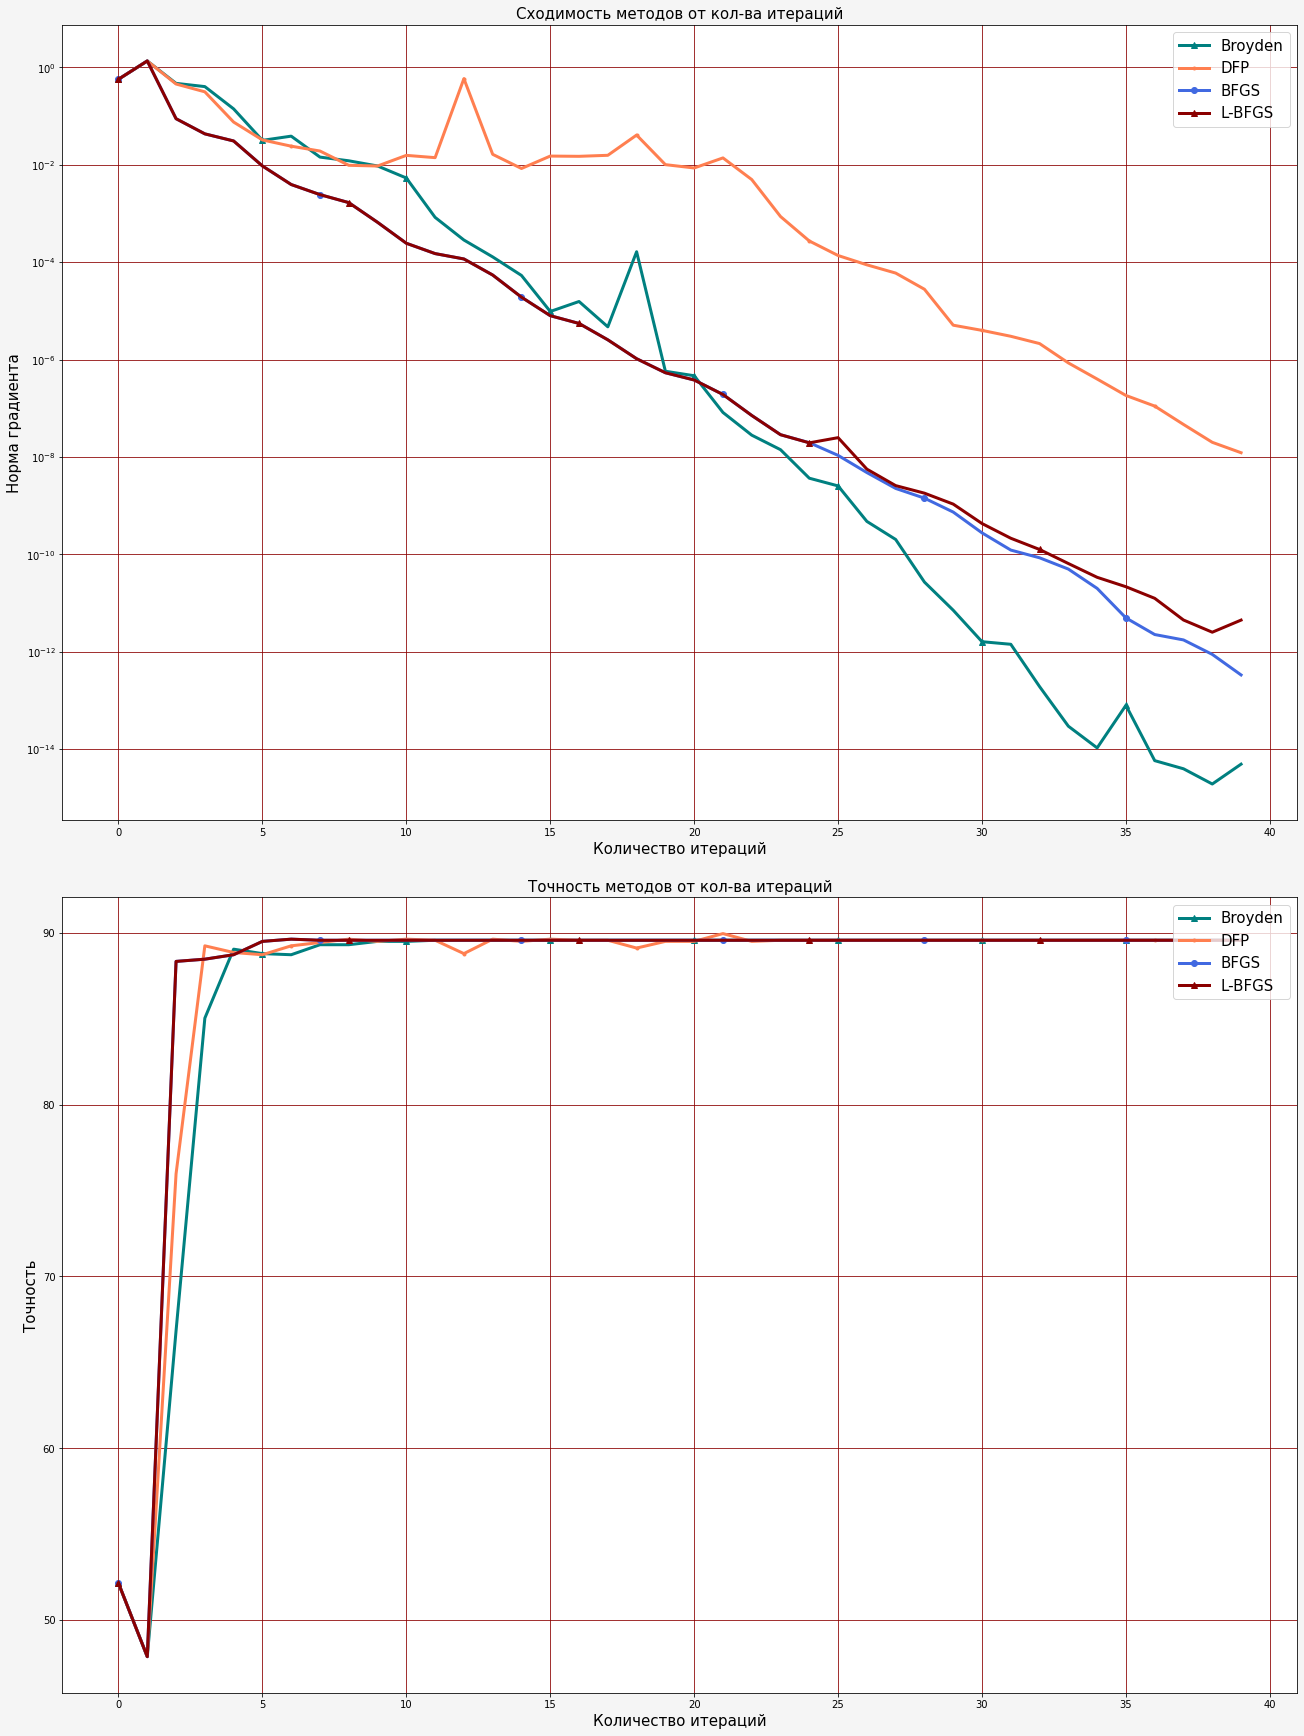

In [23]:
fg = plt.figure(figsize=(18, 24), constrained_layout=True, facecolor = "whitesmoke")
gs = gridspec.GridSpec(ncols=1, nrows=2, figure=fg)

fig_ax_1 = fg.add_subplot(gs[0, 0], facecolor = "white")

fig_ax_1.plot(values_x_Broyden[::1], values_y_Broyden[::1], 'teal', label = 'Broyden', linewidth=3, marker = '^', markevery = 5)
fig_ax_1.plot(values_x_DFP[::1], values_y_DFP[::1], 'coral', label = 'DFP', linewidth=3, marker = '.', markevery = 6)
fig_ax_1.plot(values_x_BFGS[::1], values_y_BFGS[::1], 'royalblue', label = 'BFGS', linewidth=3, marker = 'o', markevery = 7)
fig_ax_1.plot(values_x_L_BFGS[::1], values_y_L_BFGS[::1], 'darkred', label = 'L-BFGS', linewidth=3, marker = '^', markevery = 8)

fig_ax_1.legend(loc="upper right", fontsize=15)
fig_ax_1.semilogy()
fig_ax_1.set_xlabel("Количество итераций", fontsize=15)
fig_ax_1.set_ylabel("Норма градиента", fontsize=15)
fig_ax_1.set_title('Сходимость методов от кол-ва итераций', fontsize=15)
fig_ax_1.grid(color='darkred')

fig_ax_1 = fg.add_subplot(gs[1, 0], facecolor = "white")

fig_ax_1.plot(values_x_Broyden[::1], precision_list_Broyden[::1], 'teal', label = 'Broyden', linewidth=3, marker = '^', markevery = 5)
fig_ax_1.plot(values_x_DFP[::1], precision_list_DFP[::1], 'coral', label = 'DFP', linewidth=3, marker = '.', markevery = 6)
fig_ax_1.plot(values_x_BFGS[::1], precision_list_BFGS[::1], 'royalblue', label = 'BFGS', linewidth=3, marker = 'o', markevery = 7)
fig_ax_1.plot(values_x_L_BFGS[::1], precision_list_L_BFGS[::1], 'darkred', label = 'L-BFGS', linewidth=3, marker = '^', markevery = 8)

fig_ax_1.legend(loc="upper right", fontsize=15)
fig_ax_1.set_xlabel("Количество итераций", fontsize=15)
fig_ax_1.set_ylabel("Точность", fontsize=15)
fig_ax_1.set_title('Точность методов от кол-ва итераций', fontsize=15)
fig_ax_1.grid(color='darkred')



### Вывод
По точности все методы выходят на одинаковый уровень. По сходимости быстрее всего работает Бройден. Затем BFGS, L-BFGS и DFP (хуже всех). Если брать не сильную точность, то L-BFGS и BFGS работают чуть быстрее (на старте)

__Бонусные пункты__

__(в)__ Реализуйте подход из [работы](https://pages.cs.wisc.edu/~swright/726/handouts/barzilai-borwein.pdf). С помощью них решите задачу регресии. Сравните их работу с квазиньютоновскими методами. Сделайте вывод.

In [24]:
#ответ

__(г)__ Реализуйте методы Newton-Learn и Cubic-Newton-Learn из [работы](https://proceedings.mlr.press/v139/islamov21a.html). С помощью них решите задачу регресии. Сравните их работу с квазиньютоновскими методами. Какой критерий сравнения будете использовать? 

In [25]:
#ответ